##Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

##Importing the dataset

In [ ]:
df_urban = pd.read_csv('Urban_data.csv')
df_urban

,Region,City,orientation_order,street_orientation_entropy,weighted_street_orientation_entropy,median_street_segmant,average_circuity,average_node_degree,proportion_of_dead-ends,proportion_of_four_way_intersection
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096
...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369
96,US/Canada,St Louis,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374
97,US/Canada,Toronto,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217
98,US/Canada,Vancouver,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455


In [ ]:
#Size of the dataset
df_urban.shape

(100, 10)

In [ ]:
#Datatypes of column data
df_urban.dtypes

Region                                  object
City                                    object
orientation_order                      float64
street_orientation_entropy             float64
weighted_street_orientation_entropy    float64
median_street_segmant                  float64
average_circuity                       float64
average_node_degree                    float64
proportion_of_dead-ends                float64
proportion_of_four_way_intersection    float64
dtype: object

##Checking the Null values in the dataset

Preprocessing of the data is done by checking for NULL values in the data and by scaling the features of the data


In [ ]:
#Checking the Null values
df_urban.isna().sum()

Region                                 0
City                                   0
orientation_order                      0
street_orientation_entropy             0
weighted_street_orientation_entropy    0
median_street_segmant                  0
average_circuity                       0
average_node_degree                    0
proportion_of_dead-ends                0
proportion_of_four_way_intersection    0
dtype: int64

In [ ]:
#Accessing the Column Labels
df_urban.columns

Index(['Region', 'City', 'orientation_order', 'street_orientation_entropy',
       'weighted_street_orientation_entropy', 'median_street_segmant',
       'average_circuity', 'average_node_degree', 'proportion_of_dead-ends',
       'proportion_of_four_way_intersection'],
      dtype='object')

This graph shows number of cities in the particular region or country

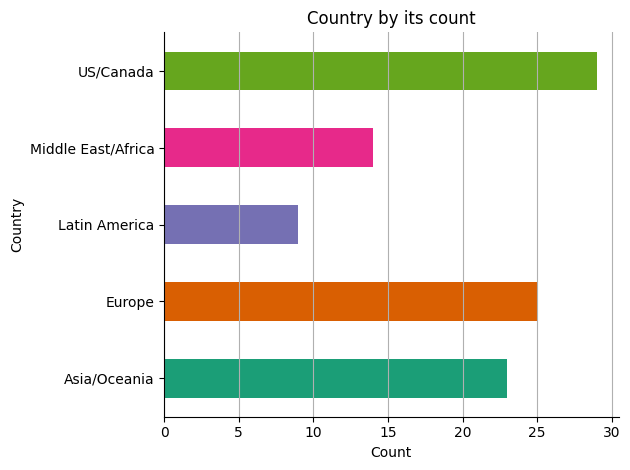

In [ ]:
df_urban.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Country by its count')
plt.grid(axis='x')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Comparing the given columns in the data by using pairplot

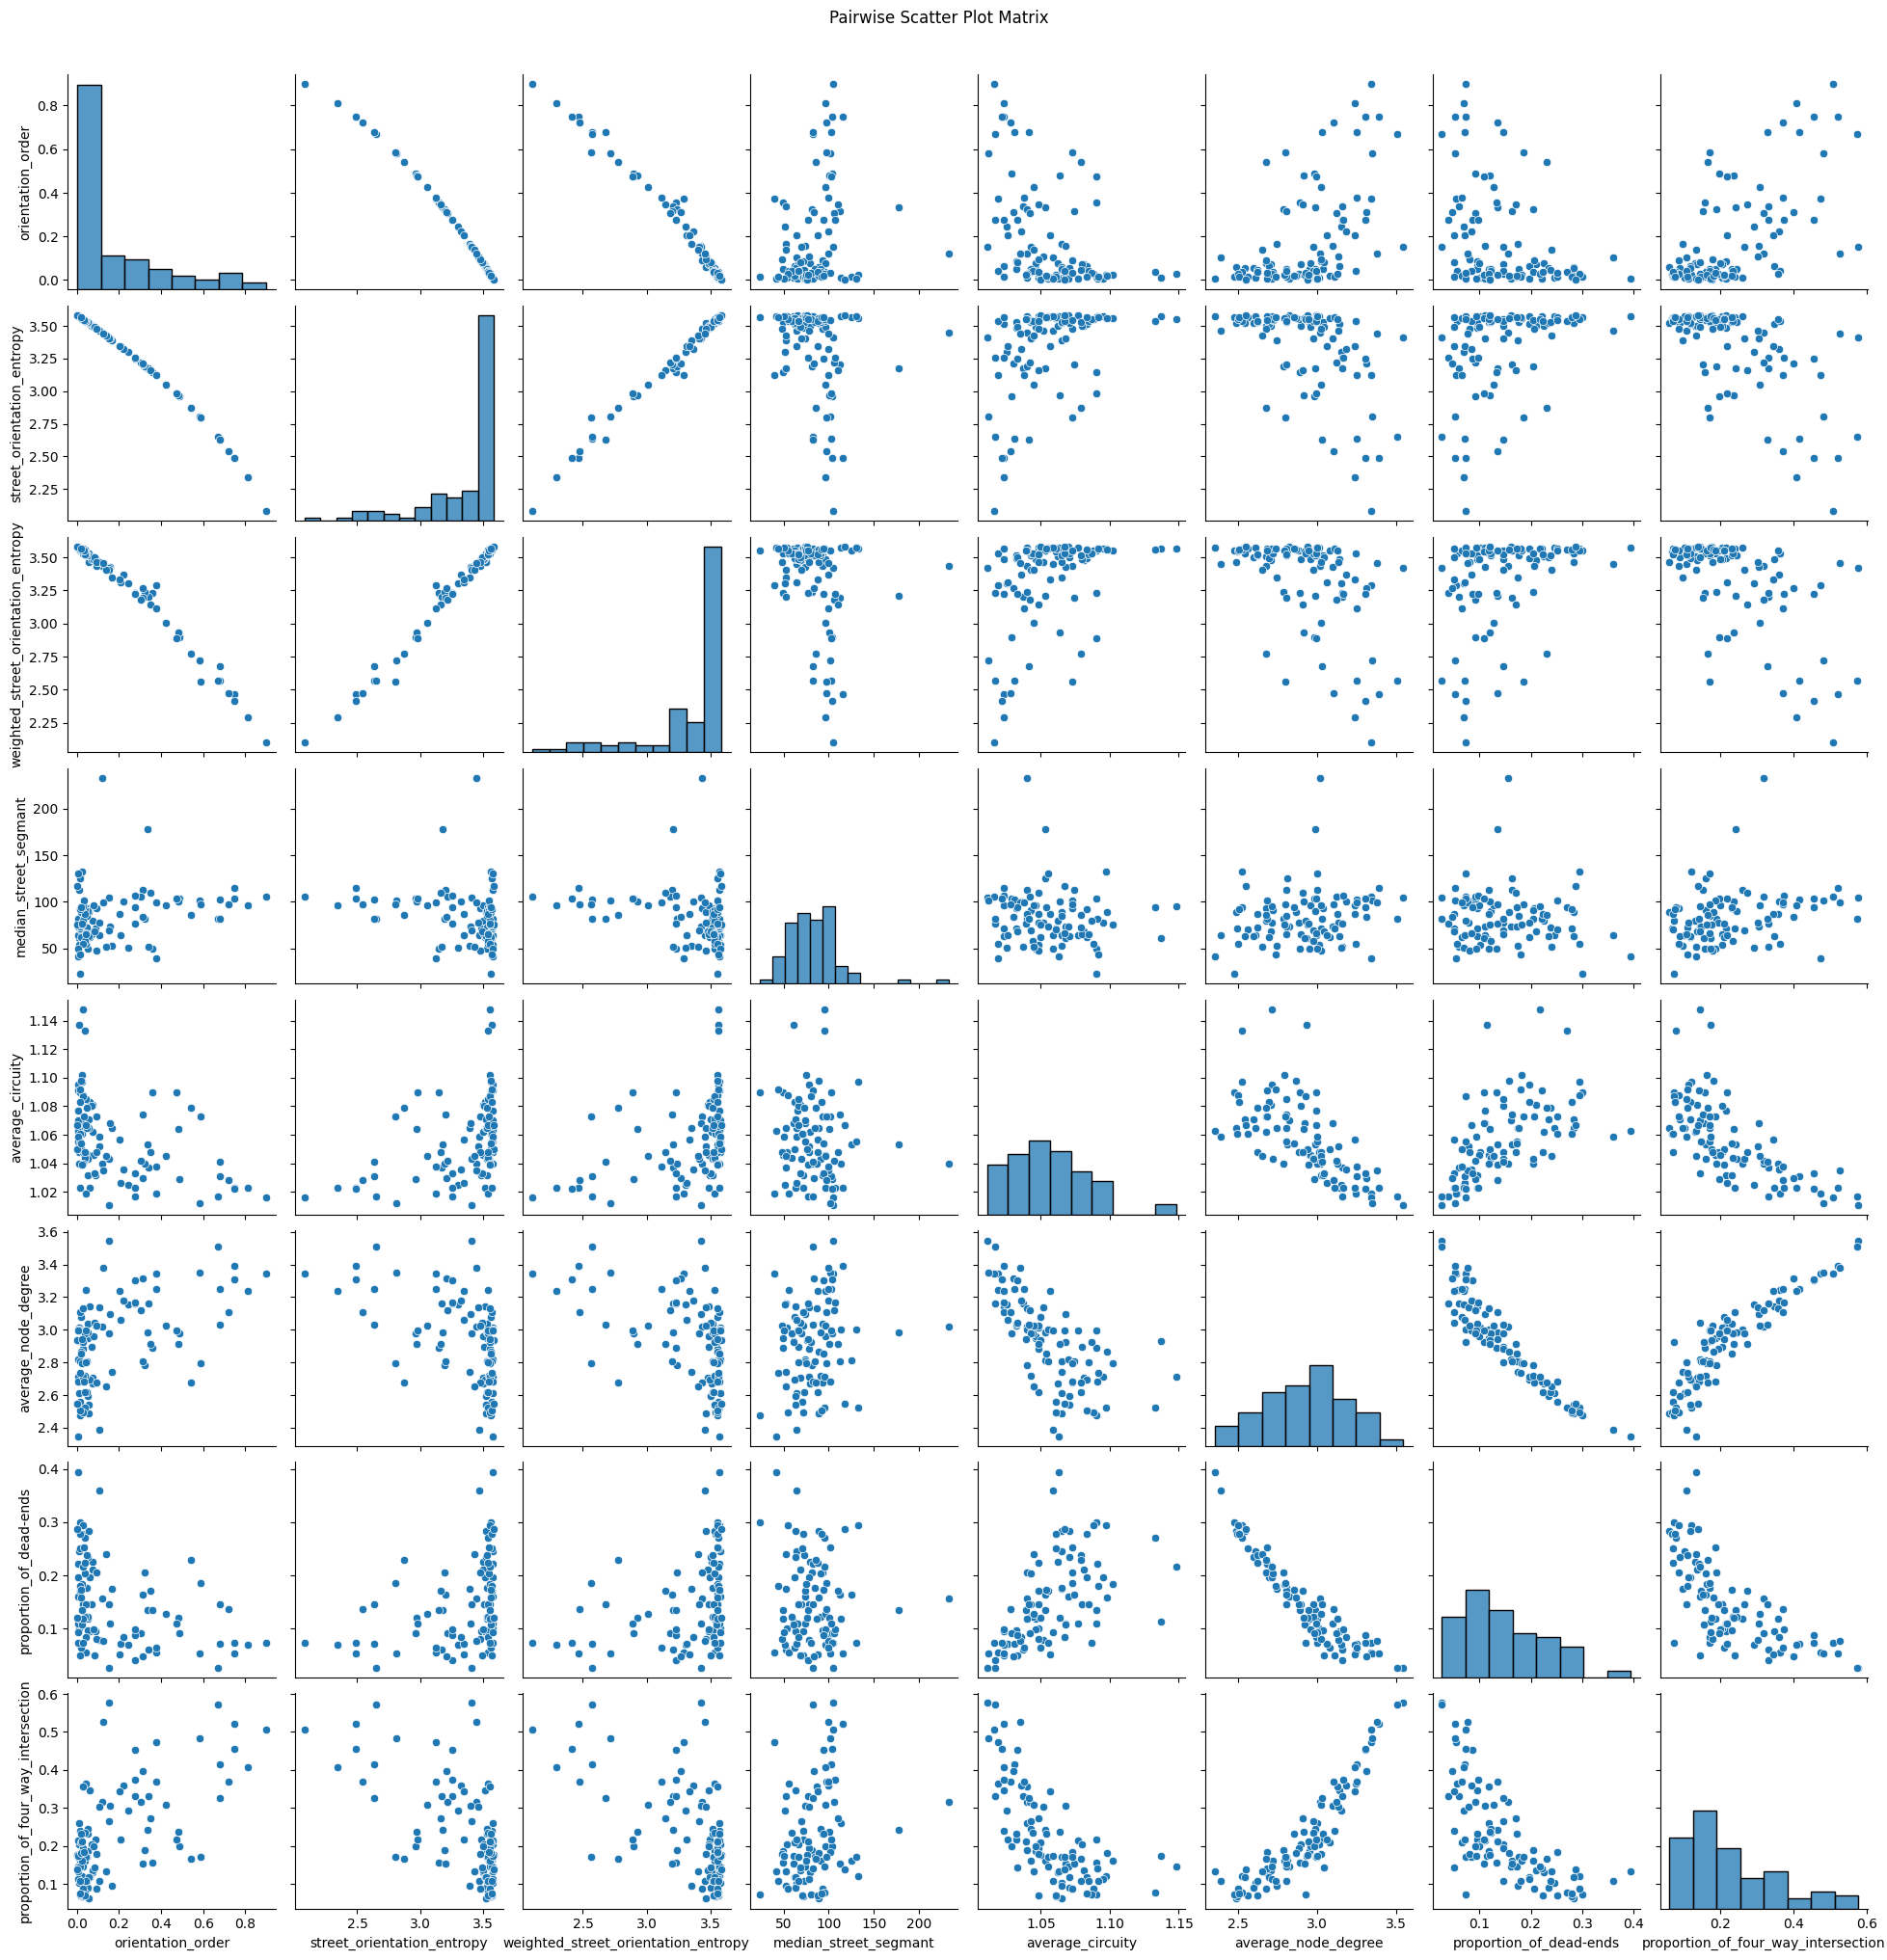

In [ ]:
# Select a subset of features for illustration
selected_features = df_urban.columns
# Create a scatter plot matrix
sns.pairplot(df_urban[selected_features])
plt.suptitle('Pairwise Scatter Plot Matrix', y=1.02)
plt.show()

A heatmap is drawn to check which features of the dataframe are more similar so that they can be taken for plotting of the Kmeans.

<ipython-input-270-8619d50289e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df_urban.corr()


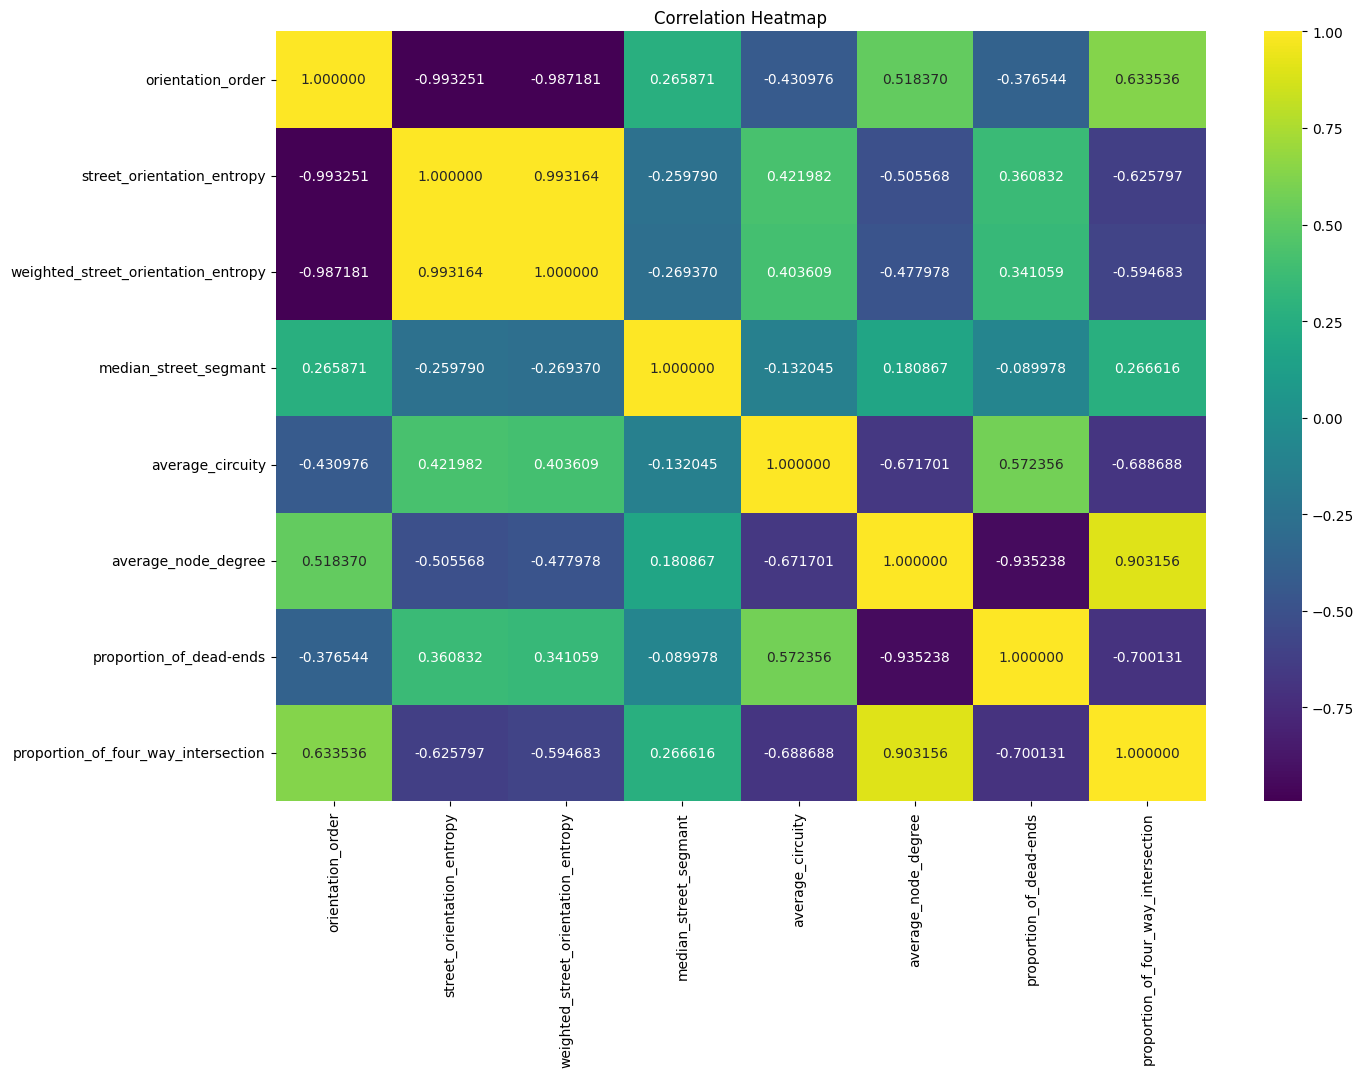

In [ ]:
data = df_urban.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(data,annot=True,cmap='viridis',fmt="2f")
plt.title('Correlation Heatmap')
plt.show()

##Seperating the numerical data columns for scaling

In [ ]:
#Storing the numerical data columns in df_num
df_num = df_urban.iloc[:, 2:10]
df_num

,orientation_order,street_orientation_entropy,weighted_street_orientation_entropy,median_street_segmant,average_circuity,average_node_degree,proportion_of_dead-ends,proportion_of_four_way_intersection
0,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096
...,...,...,...,...,...,...,...,...
95,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369
96,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374
97,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217
98,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455


##Normalizing the numerical values in the range of 0 and 1


The features have values of different ranges as we can see that the median street segment length have comparitively very high values when compared to the others. Therefore, the normalization technique is incorporated to get all the feature values in the same range.

In [ ]:
scaleMinMax = MinMaxScaler(feature_range=(0,1))
df_norm1 = scaleMinMax.fit_transform(df_num)
df_norm1 = pd.DataFrame(df_norm1, columns = ['orientation-order indicator','street orientation entropy','weighted street orientation entropy','median street segment length','average circuity','average node degree','dead-ends','four-way intersections'])
df_norm1

,orientation-order indicator,street orientation entropy,weighted street orientation entropy,median street segment length,average circuity,average node degree,dead-ends,four-way intersections
0,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262
1,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515
2,0.008919,0.993996,0.993911,0.196378,0.394161,0.218333,0.595109,0.079612
3,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417
4,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961
...,...,...,...,...,...,...,...,...
95,0.803790,0.306204,0.251015,0.352717,0.124088,0.632500,0.296196,0.598058
96,0.305463,0.782522,0.759134,0.399428,0.087591,0.680833,0.192935,0.607767
97,0.526198,0.598399,0.529093,0.380839,0.576642,0.538333,0.222826,0.302913
98,0.832776,0.270180,0.209743,0.383699,0.080292,0.800000,0.125000,0.765049


##Plotting K Means Clustering

In order to predict the K value of the Kmeans clustering the Elbow method is implemented.

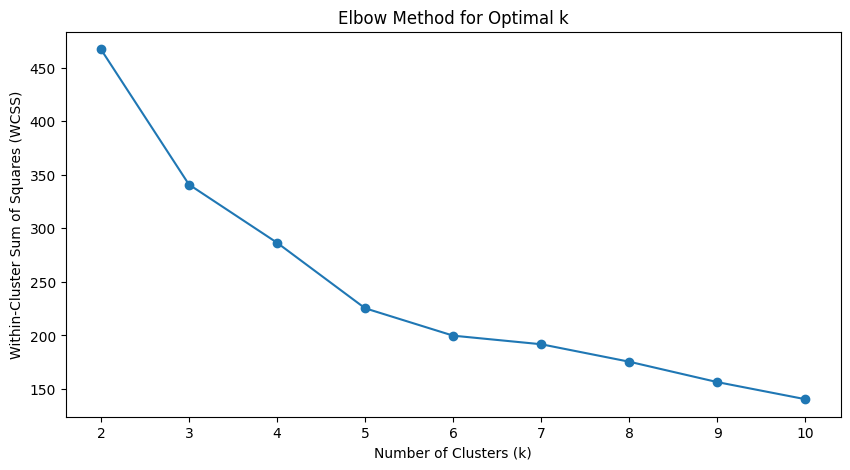

In [ ]:
wcss = []
# Range of clusters to try
k_range=range(2, 11)
# Iterate over different values of k
for k in k_range:
    # Fit KMeans clustering
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=20)
    kmeans.fit(df_norm)
    # Append WCSS to list
    wcss.append(kmeans.inertia_)
# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.show()


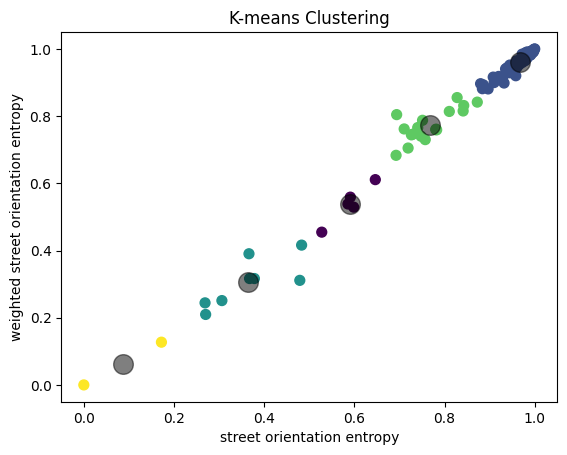

In [ ]:
X = np.array(df_norm1[['street orientation entropy','weighted street orientation entropy']])

# Specify the number of clusters
num_clusters = 5

# Create and fit the model
kmeans = KMeans(n_clusters=num_clusters,n_init=10, random_state=0).fit(X)
labels = kmeans.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("K-means Clustering")
plt.xlabel("street orientation entropy")
plt.ylabel("weighted street orientation entropy")
plt.show()

##Finding Cluster centroids




In [ ]:
scaler = StandardScaler()
df_norm = scaler.fit_transform(df_norm1)
#Considering number of clusters = 5
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(df_norm)
# Finding the cluster label for each data point
labels = kmeans.labels_
# Finding the centroid of each cluster
cluster_centers =scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers

array([[0.4474511 , 0.66141064, 0.62369295, 0.45307219, 0.34107498,
        0.45909091, 0.3451087 , 0.31721094],
       [0.0456034 , 0.96887508, 0.96196296, 0.24585915, 0.50684307,
        0.23317708, 0.57591712, 0.10485437],
       [0.80775424, 0.29026759, 0.25244324, 0.35891325, 0.09245742,
        0.77740741, 0.13858696, 0.7566343 ],
       [0.26212375, 0.81291694, 0.81600981, 0.27210439, 0.13458029,
        0.73979167, 0.10920516, 0.61868932],
       [0.05824972, 0.95966061, 0.95845315, 0.25198105, 0.30862226,
        0.51786458, 0.23581861, 0.27779126]])

In [ ]:
#Clustering labels for each city
labels

array([1, 0, 1, 1, 1, 1, 4, 1, 4, 3, 3, 1, 1, 3, 0, 1, 4, 0, 4, 1, 4, 4,
       1, 4, 3, 4, 4, 4, 4, 1, 1, 1, 4, 4, 1, 4, 4, 4, 1, 4, 4, 1, 4, 1,
       1, 1, 4, 1, 4, 3, 1, 4, 3, 4, 1, 4, 4, 4, 3, 4, 1, 4, 1, 4, 4, 1,
       1, 1, 3, 1, 1, 0, 3, 4, 1, 2, 0, 3, 2, 2, 1, 0, 0, 0, 2, 2, 2, 3,
       3, 0, 3, 0, 4, 2, 3, 2, 3, 0, 2, 3], dtype=int32)

The given dataframe has about 8 features therefore, a dimensionality reduction technique is being used for plotting the Kmeans.

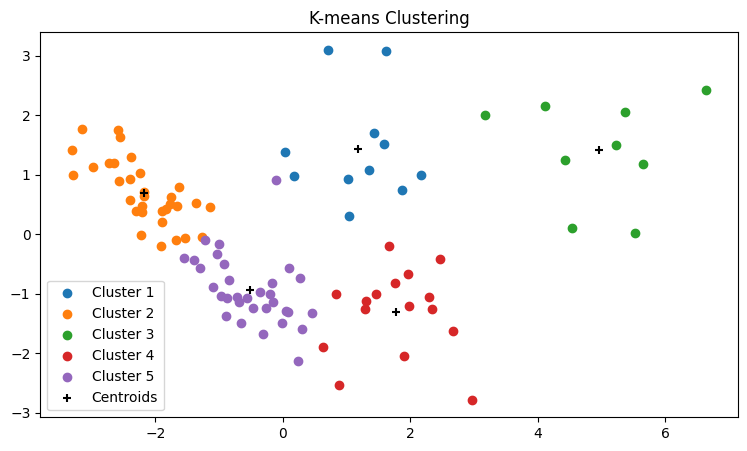

In [ ]:
# Reducing dimensionality using PCA
pca = PCA(n_components=6)
principal_components = pca.fit_transform(df_norm)

# Ploting the clusters
plt.figure(figsize=(9, 5))
num_clusters=5
for i in range(num_clusters):
    cluster_points = principal_components[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

# Ploting the cluster centroids
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], marker='+', color='black', label='Centroids')

plt.title('K-means Clustering')
plt.legend()
plt.show()


##Performing hierarchical clustering with different linkage methods.
Linkage types:
1.Single
2.Complete
3.Average
4.Ward

##Single Linkage

Cluster 1: 9 counties
Cluster 2: 2 counties
Cluster 3: 87 counties
Cluster 4: 1 counties
Cluster 5: 1 counties


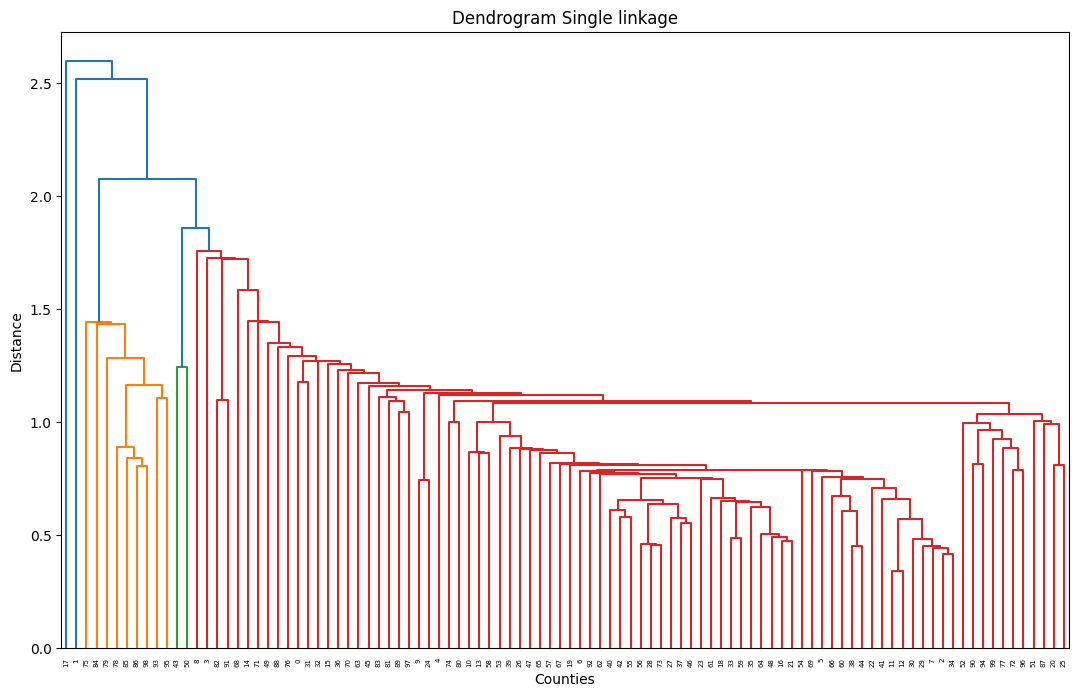

In [ ]:
plt.figure(figsize=(13, 8))
Z = linkage(df_norm, method='single')
dendrogram(Z)
plt.title('Dendrogram Single linkage')
plt.xlabel('Counties')
plt.ylabel('Distance')
#plt.xticks(rotation=90)

clusters = fcluster(Z, t=5, criterion='maxclust')  # Adjust the threshold 't' as needed
# Print the number of clusters and the size of each cluster
num_clusters = len(np.unique(clusters))
cluster_sizes = np.bincount(clusters)
for cluster_id, size in enumerate(cluster_sizes[1:], start=1):
    print(f"Cluster {cluster_id}: {size} counties")


##Complete Linkage

Cluster 1: 9 counties
Cluster 2: 33 counties
Cluster 3: 40 counties
Cluster 4: 2 counties
Cluster 5: 16 counties


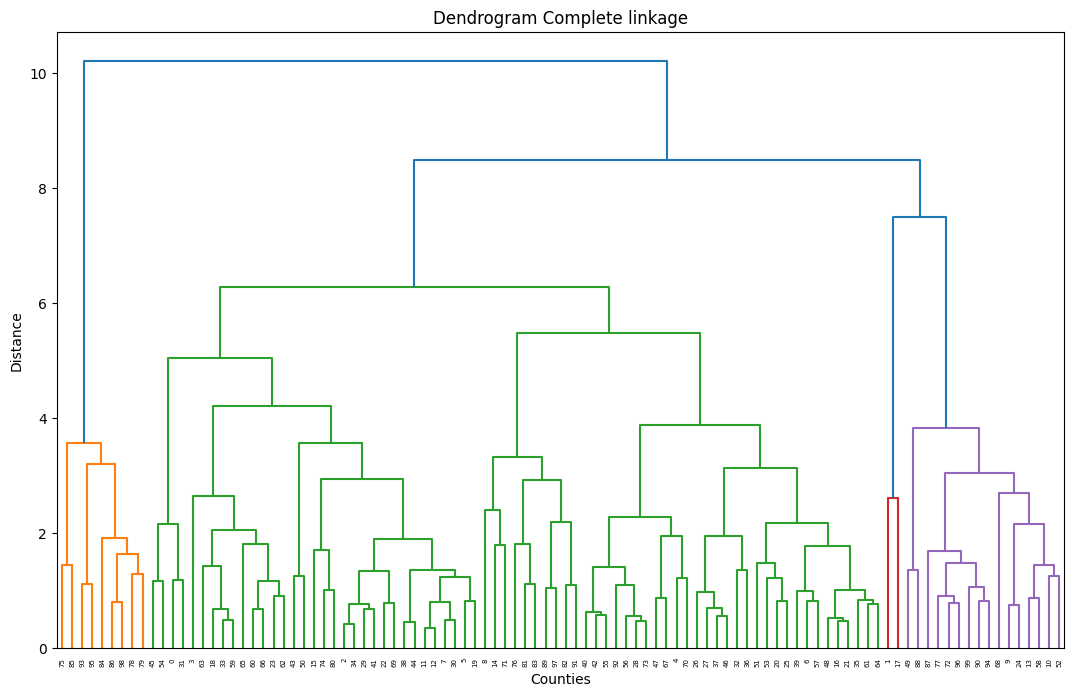

In [ ]:
plt.figure(figsize=(13, 8))
Z = linkage(df_norm, method='complete')
dendrogram(Z)
plt.title('Dendrogram Complete linkage')
plt.xlabel('Counties')
plt.ylabel('Distance')

clusters = fcluster(Z, t=5, criterion='maxclust')  # Adjust the threshold 't' as needed
# Print the number of clusters and the size of each cluster
num_clusters = len(np.unique(clusters))
cluster_sizes = np.bincount(clusters)
for cluster_id, size in enumerate(cluster_sizes[1:], start=1):
    print(f"Cluster {cluster_id}: {size} counties")

##Average Linkage

Cluster 1: 9 counties
Cluster 2: 2 counties
Cluster 3: 2 counties
Cluster 4: 33 counties
Cluster 5: 54 counties


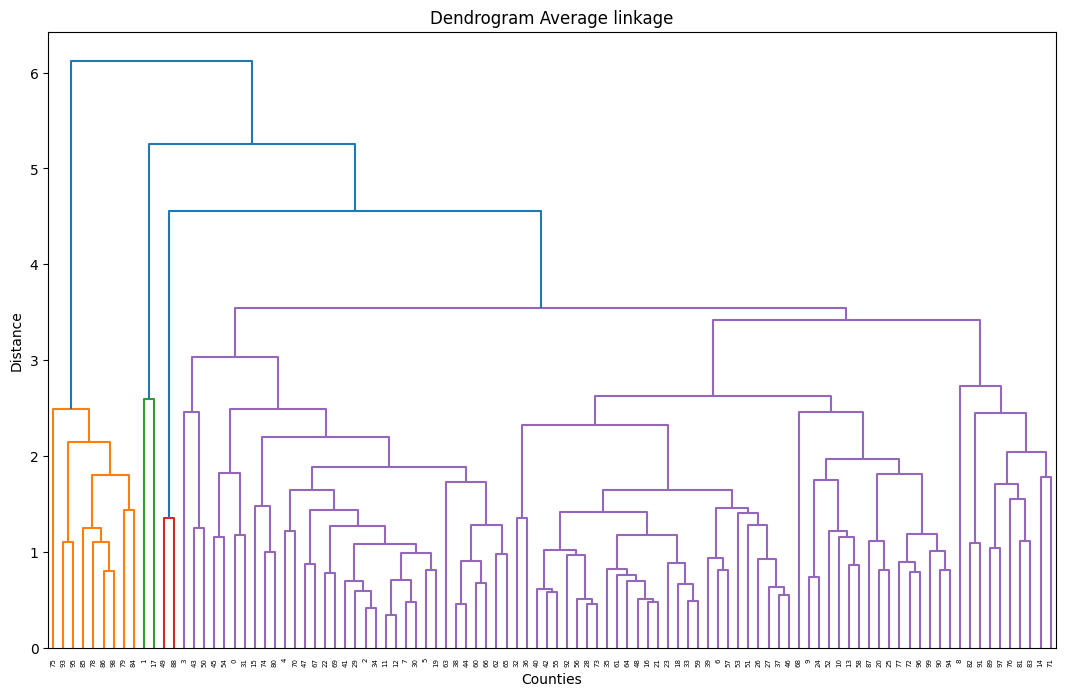

In [ ]:
plt.figure(figsize=(13, 8))
Z = linkage(df_norm, method='average')
dendrogram(Z)
plt.title('Dendrogram Average linkage')
plt.xlabel('Counties')
plt.ylabel('Distance')

clusters = fcluster(Z, t=5, criterion='maxclust')  # Adjust the threshold 't' as needed
# Print the number of clusters and the size of each cluster
num_clusters = len(np.unique(clusters))
cluster_sizes = np.bincount(clusters)
for cluster_id, size in enumerate(cluster_sizes[1:], start=1):
    print(f"Cluster {cluster_id}: {size} counties")

##Ward Linkage

Cluster 1: 9 counties
Cluster 2: 33 counties
Cluster 3: 33 counties
Cluster 4: 13 counties
Cluster 5: 12 counties


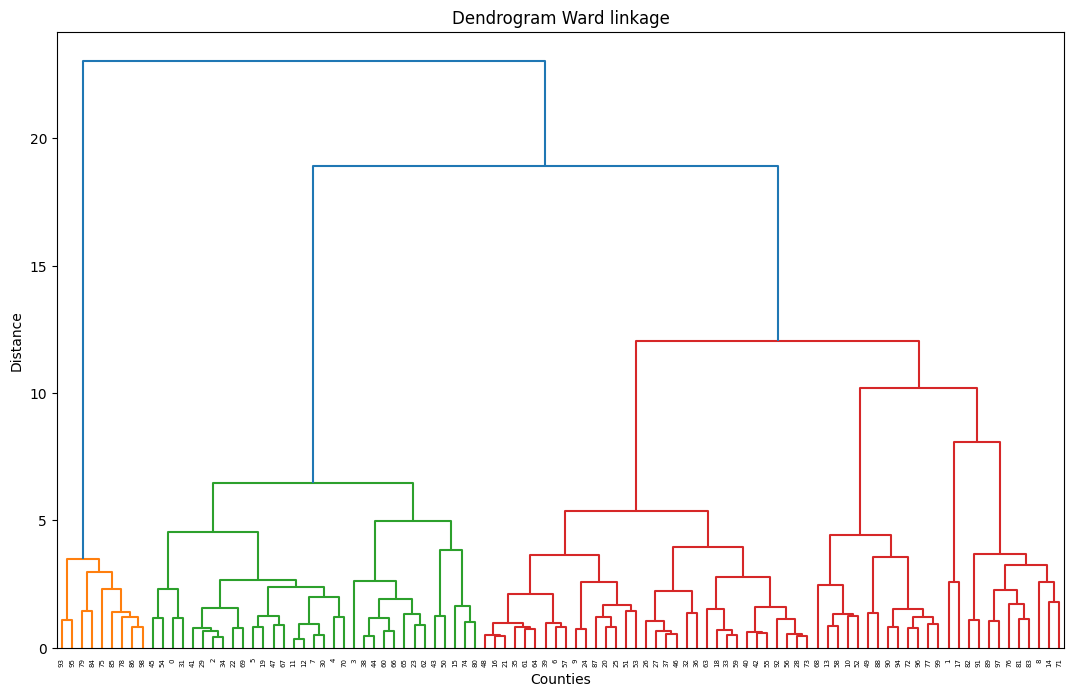

In [ ]:
plt.figure(figsize=(13, 8))
Z = linkage(df_norm, method='ward')
dendrogram(Z)
plt.title('Dendrogram Ward linkage')
plt.xlabel('Counties')
plt.ylabel('Distance')

clusters = fcluster(Z, t=5, criterion='maxclust')  # Adjust the threshold 't' as needed
# Print the number of clusters and the size of each cluster
num_clusters = len(np.unique(clusters))
cluster_sizes = np.bincount(clusters)
for cluster_id, size in enumerate(cluster_sizes[1:], start=1):
    print(f"Cluster {cluster_id}: {size} counties")

The dataframe below assigns a cluster number to each and every city according to the hierarchial clustering method.

In [ ]:
df_urban['Cluster'] = clusters
df_urban

,Region,City,orientation_order,street_orientation_entropy,weighted_street_orientation_entropy,median_street_segmant,average_circuity,average_node_degree,proportion_of_dead-ends,proportion_of_four_way_intersection,Cluster
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108,2
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241,5
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102,2
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174,2
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096,2
...,...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369,1
96,US/Canada,St Louis,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374,4
97,US/Canada,Toronto,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217,5
98,US/Canada,Vancouver,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455,1


##Interpreting with new dataset

For interpreting and visualizing the cluster data in a better way and to get more insights a new data set with Inflation rate, population and Infrastructure rating needs to be merged with the original dataframe.

In [ ]:
df_city=pd.read_excel('/content/city_data.xlsx')
df_city

,City,Population(Millions),Inflation rate,Infrastructure rating
0,Bangkok,17,5,3
1,Beijing,31,3,4
2,Hanoi,5,8,2
3,Hong Kong,8,1,4
4,Jakarta,28,4,3
...,...,...,...,...
95,Seattle,1,3,4
96,St Louis,1,1,3
97,Toronto,3,2,4
98,Vancouver,1,1,4


In [ ]:
df_merged = pd.merge(df_urban, df_city, on='City')
df_merged

,Region,City,orientation_order,street_orientation_entropy,weighted_street_orientation_entropy,median_street_segmant,average_circuity,average_node_degree,proportion_of_dead-ends,proportion_of_four_way_intersection,Cluster,Population(Millions),Inflation rate,Infrastructure rating
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108,2,17,5,3
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241,5,31,3,4
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102,2,5,8,2
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174,2,8,1,4
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096,2,28,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369,1,1,3,4
96,US/Canada,St Louis,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374,4,1,1,3
97,US/Canada,Toronto,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217,5,3,2,4
98,US/Canada,Vancouver,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455,1,1,1,4


In [ ]:
df_merged.columns

Index(['Region', 'City', 'orientation_order', 'street_orientation_entropy',
       'weighted_street_orientation_entropy', 'median_street_segmant',
       'average_circuity', 'average_node_degree', 'proportion_of_dead-ends',
       'proportion_of_four_way_intersection', 'Cluster',
       'Population(Millions)', 'Inflation rate', 'Infrastructure rating'],
      dtype='object')

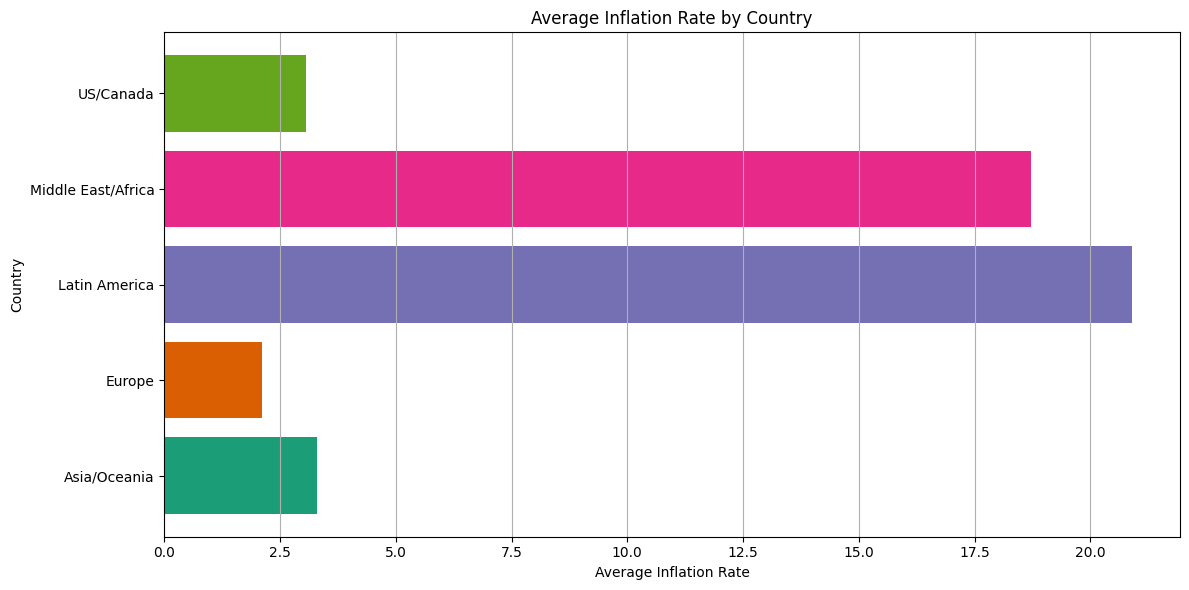

In [ ]:
average_inflation_by_country = df_merged.groupby('Region')['Inflation rate'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.barh(average_inflation_by_country['Region'], average_inflation_by_country['Inflation rate'], color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Average Inflation Rate')
plt.ylabel('Country')
plt.title('Average Inflation Rate by Country')
plt.grid(axis='x')  # Show gridlines only on y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

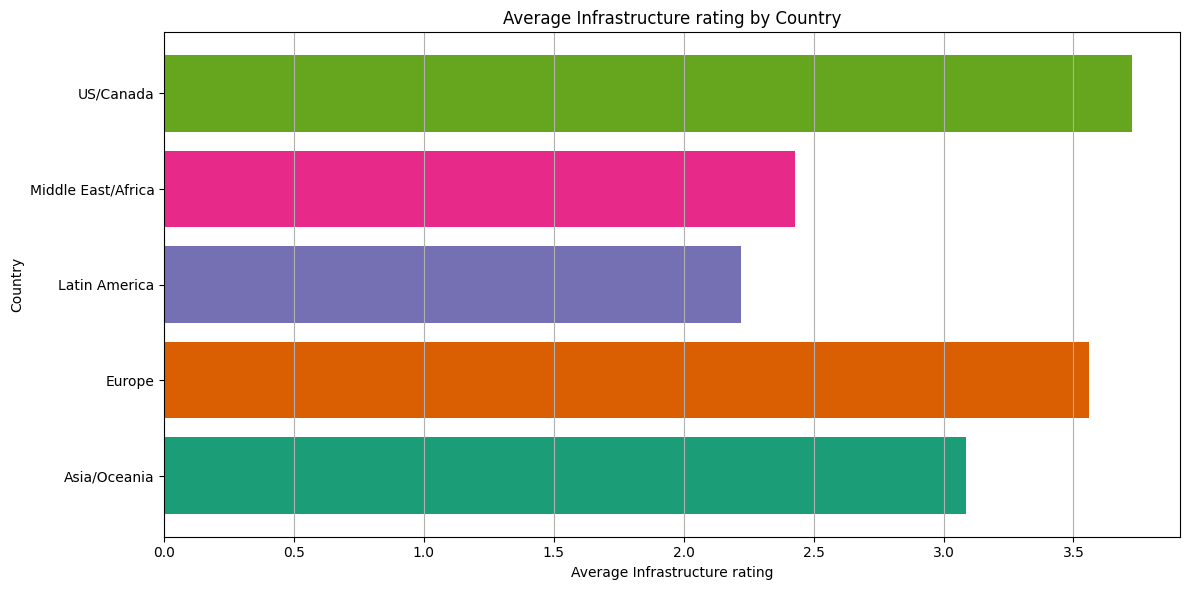

In [ ]:
average_infrastructure_by_country = df_merged.groupby('Region')['Infrastructure rating'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(average_infrastructure_by_country['Region'], average_infrastructure_by_country['Infrastructure rating'], color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Average Infrastructure rating')
plt.ylabel('Country')
plt.title('Average Infrastructure rating by Country')
plt.grid(axis='x')  # Show gridlines only on y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

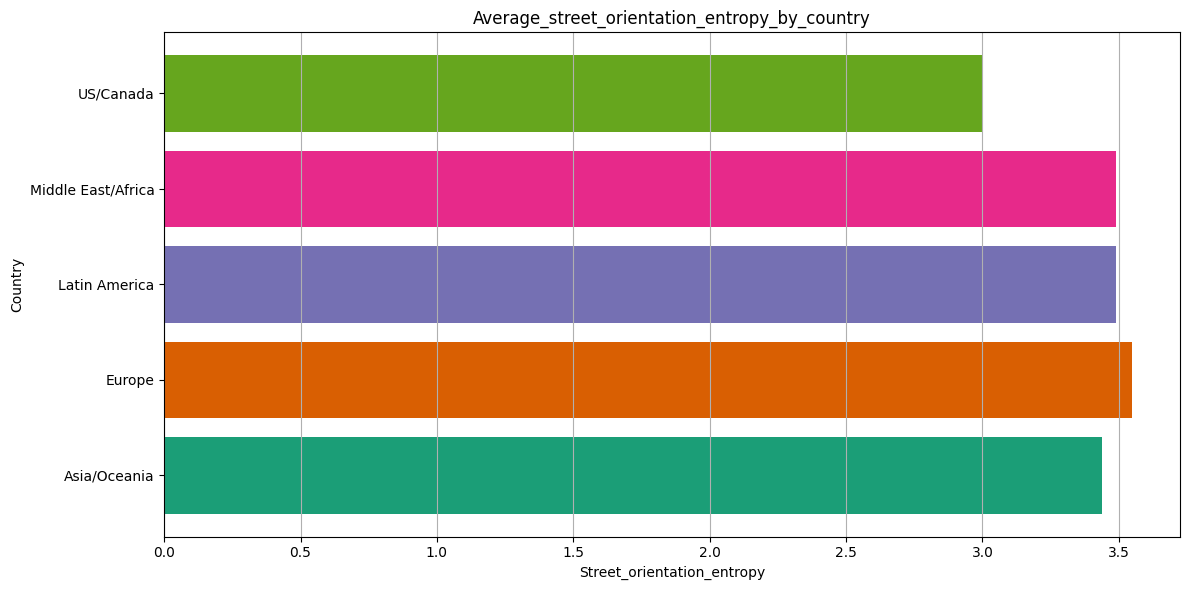

In [ ]:
average_street_orientation_entropy_by_country = df_merged.groupby('Region')['street_orientation_entropy'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(average_street_orientation_entropy_by_country['Region'], average_street_orientation_entropy_by_country['street_orientation_entropy'], color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Street_orientation_entropy')
plt.ylabel('Country')
plt.title('Average_street_orientation_entropy_by_country')
plt.grid(axis='x')  # Show gridlines only on y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

##Conclusion


From the above graphs drawn we can see that the street orientation entropy value for the US/Canada region is shown as the least. Therefore, according to the reserach paper the road conditions are better when the entropy is low.
According to these values the US/Canada region has a greater Infrastructure as the roads are also in a good condition in the cities of US/Canada. In the same comparison the Middle East/Africa region has a very high entropy hence indicating the road conditions to be poor, the infrastructure situation in the region is therefore also shown to be low.
In the same way the comparison between the regions and the inflation rate shows that the inflation for the Middle east/ Africa and Latin America is very high.Therefore according to the entropy the roads are in bad conditions so we can also relate this to the high inflation in the regions.